\begin{center} 
Chun-Yuan (Scott) Chiu 
\end{center}

\begin{center} 
chunyuac@andrew.cmu.edu 
\end{center} 

# 1. {-}

## (a) {-}

Below is the definition of the function ```data``` that, given the value of $\rho$, will draw a sample of size 100 from the bivariate normal distribution with desired mean and covariance matrix. 

In [1]:
from scipy.stats import multivariate_normal
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

sample_size = 100
mu = [1, 2]
sigma = lambda rho: [[1, rho], [rho, 1]]
dist = lambda rho: multivariate_normal(mean=mu, cov=sigma(rho))
data = lambda rho: DataFrame(dist(rho).rvs(sample_size), columns=['x', 'y'])
mean = DataFrame([mu], columns=['x', 'y'])

Use the ```data``` function to draw a sample with $\rho=0.6$. The size of the resulting sample is confirmed to be $100\times 2$.

In [2]:
X = data(rho=0.6)
X.shape

(100, 2)

Here is a comparison of the scatter plots with $\rho=0.6$ and $\rho=0.9$. Both look like an ellipse-shaped cloud of data points, but the ellipse is more flattened when $\rho$ is large. 

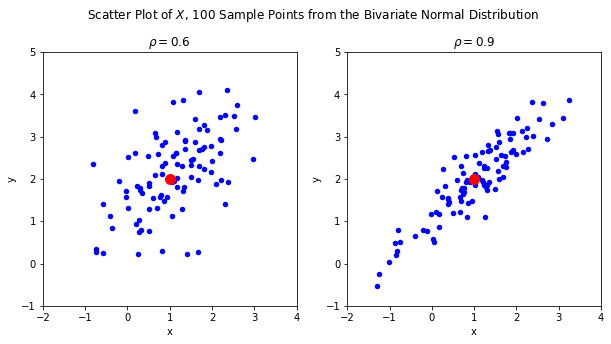

In [3]:
fig, (ax0, ax1) = plt.subplots(1, 2)

X = data(rho=0.6)
X.plot(kind='scatter', x='x', y='y', color='blue', ax=ax0) 
data(rho=0.9).plot(kind='scatter', x='x', y='y', color='blue', ax=ax1)
mean.plot(kind='scatter', x='x', y='y', color='red', s=100, xlim=(-2, 4), ylim=(-1, 5), ax=ax0)
mean.plot(kind='scatter', x='x', y='y', color='red', s=100, xlim=(-2, 4), ylim=(-1, 5), ax=ax1)

ax0.set(aspect=1, title='$\\rho = 0.6$')
ax1.set(aspect=1, title='$\\rho = 0.9$');
fig.set_size_inches(10, 5)
fig.suptitle('Scatter Plot of $X$, 100 Sample Points from the Bivariate Normal Distribution')
plt.show()

## (b) {-}

Below is the histogram of the marginal distribution. The blue line is the KDE plot and the red line is the normal pdf, the height scaled to match the sample size. 

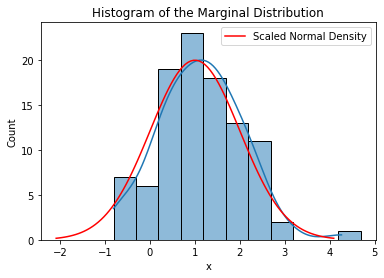

In [4]:
from scipy import stats
import numpy as np
import seaborn as sns

rho = 0.6
norm = stats.norm(loc=mu[0], scale=sigma(rho)[0][0])

binwidth = 0.5
xs = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
ax = sns.histplot(data=X, x='x', kde=True, binwidth=binwidth)
ax.set(title='Histogram of the Marginal Distribution')
Series({x: binwidth*sample_size*norm.pdf(x) for x in xs}, name='Scaled Normal Density').plot(color='red', ax=ax, legend=True)
plt.show()


## (c) {-}

Below is a histogram of $Xv$. The variance looks larger than the first column of the data. In fact analytically it can be shown that $V(Xv) = 1+\rho$. 

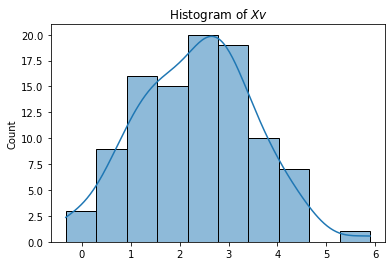

In [5]:
ax = sns.histplot(X @ [1/np.sqrt(2), 1/np.sqrt(2)], kde=True)
ax.set(title='Histogram of $Xv$')
plt.show()

## (d) {-}

The eigenvalues and eigenvectors are computed by the ```numpy.linalg.eig``` function. The eigenvectors are in the major and minor axis directions of the ellipse. They also are the directions in which the data movements have the largest and smallest variances, with the length $2\sqrt \lambda_i$ being proportional to the variances. 

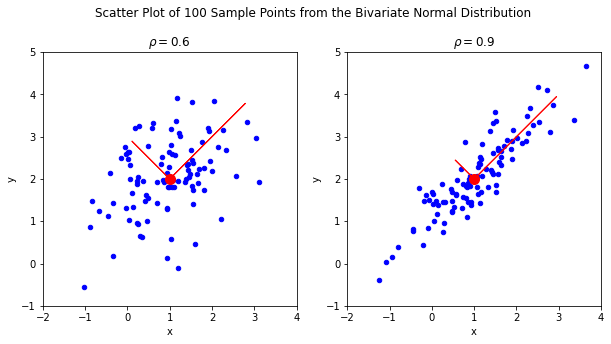

In [6]:
fig, (ax0, ax1) = plt.subplots(1, 2)

data(rho=0.6).plot(kind='scatter', x='x', y='y', color='blue', ax=ax0) 
data(rho=0.9).plot(kind='scatter', x='x', y='y', color='blue', ax=ax1)
mean.plot(kind='scatter', x='x', y='y', color='red', s=100, xlim=(-2, 4), ylim=(-1, 5), ax=ax0)
mean.plot(kind='scatter', x='x', y='y', color='red', s=100, xlim=(-2, 4), ylim=(-1, 5), ax=ax1)

w, v = np.linalg.eig(sigma(0.6))
ax0.arrow(*mu, *(2*np.sqrt(w[0])*v[:, 0]), color='r')
ax0.arrow(*mu, *(2*np.sqrt(w[1])*v[:, 1]), color='r')

w, v = np.linalg.eig(sigma(0.9))
ax1.arrow(*mu, *(2*np.sqrt(w[0])*v[:, 0]), color='r')
ax1.arrow(*mu, *(2*np.sqrt(w[1])*v[:, 1]), color='r')

ax0.set(aspect=1, title='$\\rho = 0.6$')
ax1.set(aspect=1, title='$\\rho = 0.9$');
fig.set_size_inches(10, 5)
fig.suptitle('Scatter Plot of 100 Sample Points from the Bivariate Normal Distribution')
plt.show()

## (g) {-}

Again the below scatter plot of $Z$ looks like an ellipse-shaped cloud of data points, only this ellipse is not rotated. Its major and minor axes are horizontal and vertical. 

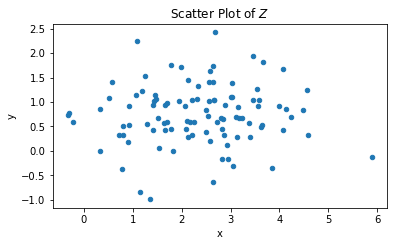

In [7]:
w, v = np.linalg.eig(sigma(0.6))
v1 = v[:, 0]
v2 = v[:, 1]

Z = DataFrame({'x': X@v1, 'y': X@v2})
ax = Z.plot(kind='scatter', x='x', y='y')
ax.set(aspect=1, title='Scatter Plot of $Z$')
plt.show()

The correlations are computed below. For $X$ it is close to 0.6 which is expected. For $Z$ it is close to zero. 

In [8]:
print(X['x'].corr(X['y']))  # X
print(Z['x'].corr(Z['y']))  # Z

0.5774572519517679
0.041316300168865436


# 2. {-}

## (a) {-}

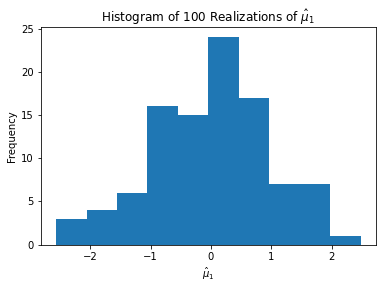

Fraction of confidence intervals that cover 0: 0.96


In [32]:
from pandas import Series
import seaborn as sns

sample = [stats.norm.rvs(size=100)[0] for i in range(100)]
ss = Series(sample)
ax = ss.plot(kind='hist')
ax.set(xlabel='$\hat\mu_1$', title='Histogram of 100 Realizations of $\hat\mu_1$')
plt.show()

z = stats.norm.ppf(1 - 0.025)    # 1.96

print('Fraction of confidence intervals that cover 0:', ss[(ss-z < 0) & (ss+z > 0)].size / ss.size)

## (b) {-}

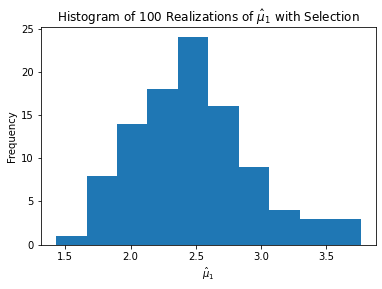

Fraction of confidence intervals that cover 0: 0.09


In [37]:
from pandas import Series

sample = [max(stats.norm.rvs(size=100)) for i in range(100)]
ss = Series(sample)
ax = ss.plot(kind='hist')
ax.set(xlabel='$\hat\mu_1$', title='Histogram of 100 Realizations of $\hat\mu_1$ with Selection')
plt.show()


z = stats.norm.ppf(1 - 0.025)    # 1.96

print('Fraction of confidence intervals that cover 0:', ss[(ss-z < 0) & (ss+z > 0)].size / ss.size)

# 3. {-}

## (a) {-}

The proof will consist of two parts. First we show that $\hat\beta^{\text{ridge}}$ is the solution to $(X^T X + \lambda I)\beta = X^T y$. Second we show that the OLS estimator with predictor matrix $\tilde X$ and $\tilde y$ is also the solution to the same linear system. Thus they are identical. 

To verify the first part, we expand the objective function: 
\begin{align*}
\lVert y - X\beta \rVert^2_2 + \lambda\lVert \beta \rVert^2_2 &= (y - X\beta)^T(y - X\beta) + \lambda \beta^T\beta\\
&= (y^Ty - 2\beta^TX^Ty + \beta^TX^TX\beta) + \lambda \beta^T\beta\\
&= y^Ty - 2\beta^TX^Ty + \beta^T(X^TX + \lambda I)\beta.
\end{align*}
This is a quadratic form in $\beta$. At its minimum the gradient must be zero, so 
\begin{align*}
-2X^Ty + ((X^TX + \lambda I) + (X^TX + \lambda I)^T)\beta = 0. 
\end{align*}
Simplify to conclude that $\hat\beta^{\text{ridge}}$, where the objective function reaches its minimum, is the solution to $(X^T X + \lambda I)\beta = X^T y$.


For the second part, we know that the OLS estimator is the solution to $\tilde X^T\tilde X \beta = \tilde X^T\tilde y$. Using block matrix multiplication, it is easy to see that $\tilde X^T\tilde X = X^TX +\lambda I$ and $\tilde X^T\tilde y = X^T\tilde y$. So again the OLS estimator is the solution to $(X^T X + \lambda I)\beta = X^T y$ and hence the proof is complete. 


## (b) {-}

If the columns of $\tilde X$ are linearly dependent, by definition there exists a non-zero vector $v\in\mathbb R^p$ such that $\tilde X v$ is a zero vector in $\mathbb R^{n+p}$. But using block matrix multiplication, we see that this also means $(\sqrt{\lambda I})v = \sqrt\lambda v$ is a zero vector in $\mathbb R^{p}$, a contraction. So the columns of $\tilde X$ are linearly independent.


## (c) {-}

In part (a), we have established that $\hat\beta^{\text{ridge}}$ is the solution to $(X^T X + \lambda I)\beta = X^T y$. Assuming $\lambda > 0$, or $\lambda = 0$ but $n>p$ and $X$ is full-rank, $(X^T X + \lambda I)$ is clearly positive definite and hence invertible, in which case $\hat\beta^{\text{ridge}} = (X^T X + \lambda I)^{-1}X^T y$, and $a^T\hat\beta^{\text{ridge}} = a^T(X^T X + \lambda I)^{-1}X^T y$ is a linear function of $y$. Without the assumptions, $\hat\beta^{\text{ridge}}$ is still the solution to $(X^T X + \lambda I)\beta = X^T y$ but there is no guarantee that $X^T X + \lambda I$ is invertible. 


# 4. {-}

## (a) {-}

Note that $U^TU = I$ and, because $D$ is diagonal, $D(D^{2})^{-1}D = I$. Thus in OLS we have 
\begin{align*}
\hat Y &= X(X^TX)^{-1}X^TY \\ 
&= UDV^T(VDU^TUDV^T)^{-1}VDU^TY \\
&= UDV^T(VD^2V^T)^{-1}VDU^TY \\
&= UDV^T(V^T)^{-1}(D^2)^{-1}V^{-1}VDU^TY \\
&= UD(D^2)^{-1}DU^TY \\
&= UU^TY.
\end{align*}


## (b) {-}

In the ridge regression we have 
\begin{align*}
\hat Y_{ridge} &= X(X^TX + \lambda I)^{-1}X^TY \\ 
&= UDV^T(VDU^TUDV^T + \lambda I)^{-1}VDU^TY \\
&= UDV^T(VD^2V^T + \lambda I)^{-1}VDU^TY \\
&= UDV^T(VD^2V^T + \lambda VV^T)^{-1}VDU^TY \\
&= UDV^T(V(D^2 + \lambda I)V^T)^{-1}VDU^TY \\
&= UDV^T(V^T)^{-1}(D^2 + \lambda I)^{-1}V^{-1}VDU^TY \\
&= UD(D^2 + \lambda I)^{-1}DU^TY \\
&= UD^2(D^2 + \lambda I)^{-1}U^TY. 
\end{align*}
In matrix form this is about the most simplified expression we can get. Since $D$ is diagonal, we have
\begin{align*}
D^2(D^2 + \lambda I)^{-1} = \text{diag}\left(\frac{d_1^2}{d_1^2 + \lambda}, \frac{d_2^2}{d_2^2 + \lambda}, \ldots, \frac{d_p^2}{d_p^2 + \lambda}\right). 
\end{align*}


## (c) {-}

In (b) we have established that $\hat Y_{ridge} = U S U^TY$, where
\begin{align*}
S = D^2(D^2 + \lambda I)^{-1} = \text{diag}\left(\frac{d_1^2}{d_1^2 + \lambda}, \frac{d_2^2}{d_2^2 + \lambda}, \ldots, \frac{d_p^2}{d_p^2 + \lambda}\right). 
\end{align*}
From this equation we can already see that when $\lambda = 0$, we will have $S=I$ and $\hat Y_{ridge}$ reduces to the OLS estimator $\hat Y$.


Next we will prove 
\begin{align*}
\hat Y_{ridge} = \sum_{j=1}^p \frac{d_j^2}{d_j^2 + \lambda} u_ju_j^T Y.
\end{align*}
First denote $s_j = d_j^2/(d_j^2 + \lambda)$, and denote by $S_j$ the matrix $\text{diag}(0, 0, \ldots, 0, s_j, 0, \ldots, 0)$. Then $S$ can be written as a sum $S = \sum_{j=1}^p S_j$ and thus
\begin{align*}
\hat Y_{ridge} = \sum_{j=1}^p U S_j U^TY. 
\end{align*}
But using block matrix multiplication, 
\begin{align*}
U S_j U^T &= \begin{pmatrix}u_1 & u_2 & \ldots & u_p\end{pmatrix} \begin{pmatrix}&&&&0\\&&&&0\\&&&&\vdots\\0 & 0 &\cdots & 0 & s_j & 0 &\cdots & 0 \\&&&&\vdots\\&&&&0\\&&&&0\end{pmatrix} U^T\\
&= \begin{pmatrix}\vec 0 &\vec 0 &\cdots &\vec 0 & s_ju_j &\vec 0 &\cdots &\vec 0 \end{pmatrix}\begin{pmatrix}u_1^T\\u_1^T\\\vdots\\u_p^T\end{pmatrix}\\
&= s_j u_ju_j^T = \frac{d_j^2}{d_j^2 + \lambda} u_ju_j^T.
\end{align*}
The proof is complete. 



